In [1]:
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
#from sklearn import decomposition
from sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
#from sklearn.linear_model import SGDClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.naive_bayes import BernoulliNB, MultinomialNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score
#from matplotlib import rcParams
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
#rcParams['axes.titlepad'] = 40
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from cycler import cycler

In [2]:
# Base de dados filipina de renda familiar e gastos anuais categorizados
# Fonte: https://www.kaggle.com/grosvenpaul/family-income-and-expenditure/kernels
df = pd.read_csv("Family Income and Expenditure.csv")

In [3]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
Total Household Income                           41544 non-null int64
Region                                           41544 non-null object
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null object
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  

In [5]:
# Ideia da seleção de features: Usar renda familiar e dados de pessoas / idade e familiares empregados 
# para prever gasto por categoria

features_list = ['Total Household Income', 
                 'Total Number of Family members',
        'Members with age less than 5 year old',
       'Members with age 5 - 17 years old',
       'Total number of family members employed',
       
       'Total Food Expenditure', 
       'Restaurant and hotels Expenditure',
       'Alcoholic Beverages Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 
       'Medical Care Expenditure', 
       'Transportation Expenditure',
       'Communication Expenditure', 
       'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure'
]

print('Features utilizadas:', len(features_list))

Features utilizadas: 16


In [6]:
df_tri = df[features_list]

In [7]:
df_tri.describe()

,Total Household Income,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Total Food Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,4.635182,0.410216,1.362579,1.272699,85099.158194,15436.566075,1085.068121,4954.621076,3.837547e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001
std,2.868805e+05,2.280252,0.694390,1.408000,1.149152,51637.947682,23705.195929,2174.431913,7496.500945,5.311168e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681
min,1.128500e+04,1.000000,0.000000,0.000000,0.000000,2947.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,3.000000,0.000000,0.000000,0.000000,51017.250000,1930.000000,0.000000,1365.000000,1.308000e+04,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000
50%,1.640795e+05,4.000000,0.000000,1.000000,1.000000,72985.500000,7314.000000,270.000000,2740.000000,2.299200e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1500.000000
75%,2.911385e+05,6.000000,1.000000,2.000000,2.000000,105635.500000,19921.250000,1299.250000,5580.000000,4.594800e+04,4.680000e+03,13776.000000,3900.000000,4060.000000,14154.000000,5000.000000
max,1.181599e+07,26.000000,5.000000,8.000000,8.000000,827565.000000,725296.000000,59592.000000,356750.000000,2.188560e+06,1.049275e+06,834996.000000,149940.000000,731000.000000,553560.000000,556700.000000


In [8]:
target = 'Total Household Income'
df_tri[target].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

In [9]:
# Converting anual to month revenues
#df_tri[target] = df_tri[target]/12
#target_new = 'Total Household Income (Monthly)'
#df_tri = df_tri.rename(columns={target:target_new})
#target = target_new
#df_tri[target] = df_tri[target].astype(float)
#df_tri[target].describe()

## Análise de Dados Exploratória

Abaixo serão explorados os principais parâmetros a serem utilizados no modelo preditivo de gastos categorizados

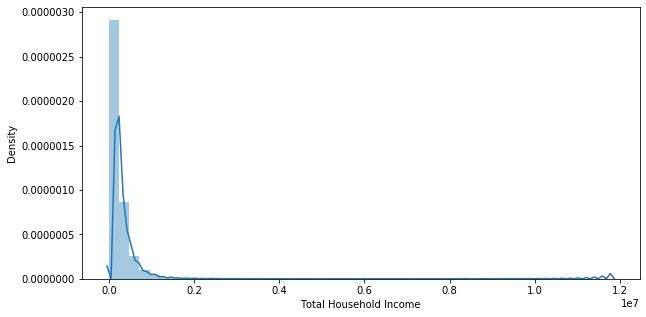

In [10]:
# Distribuição de probabilidade das observações de 'Total House Income'

plt.subplots(figsize=(10, 5))
s = sns.distplot(df_tri[target])
s.set(ylabel='Density')
plt.show()

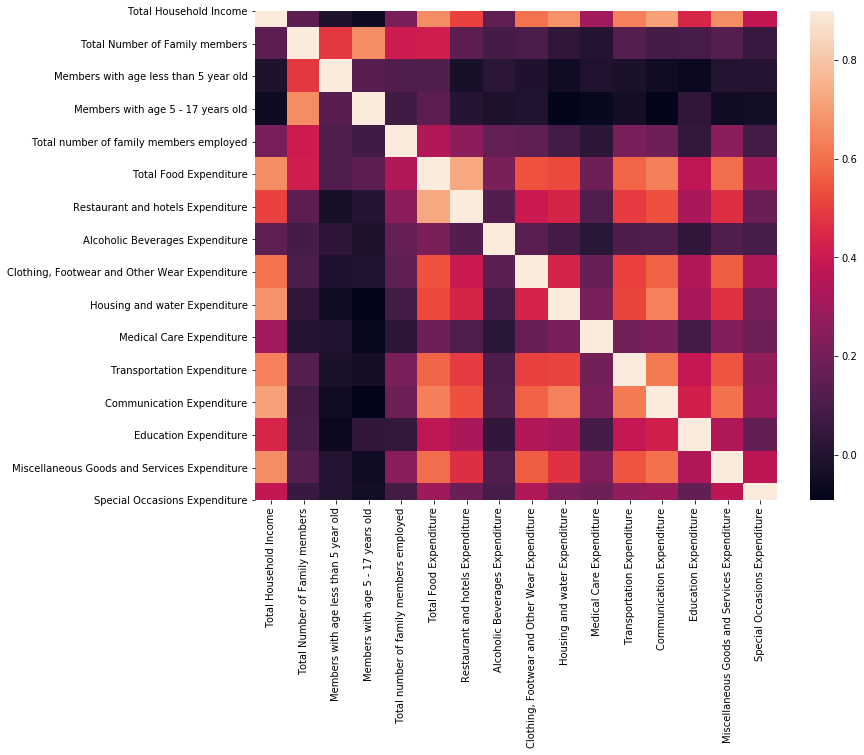

In [11]:
# Mapa de calor  de correlações cruzadas

corrmat = df_tri.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True)
plt.show()

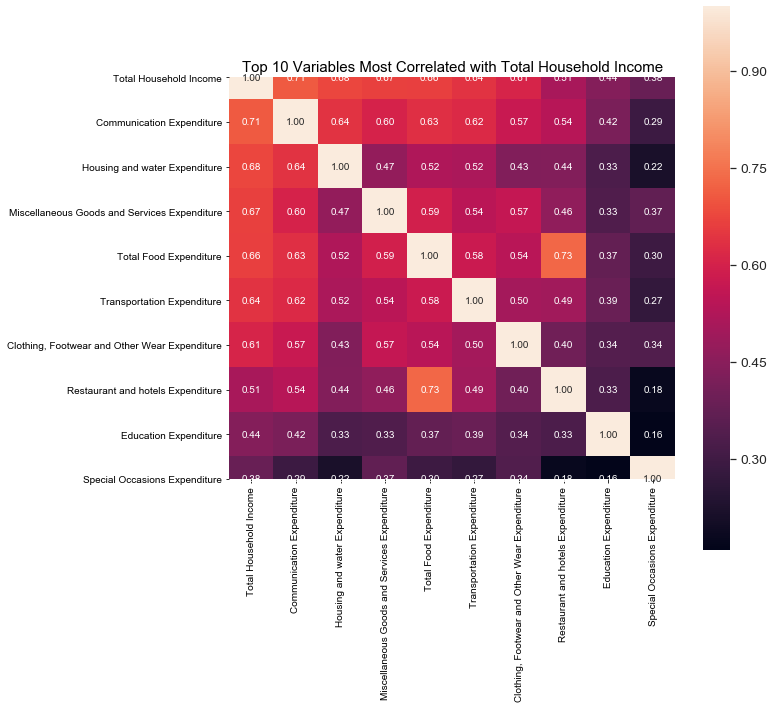

In [12]:
# 10 Variáveis com maior correlação à 'Total Household Income'

k = 10
corrmat = df_tri.corr()
cols = corrmat.nlargest(k, target)[target].index
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df_tri[cols].values.T)
sns.set(font_scale=1.25)
s = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
s.set_title("Top 10 Variables Most Correlated with Total Household Income", size=15)
plt.show()

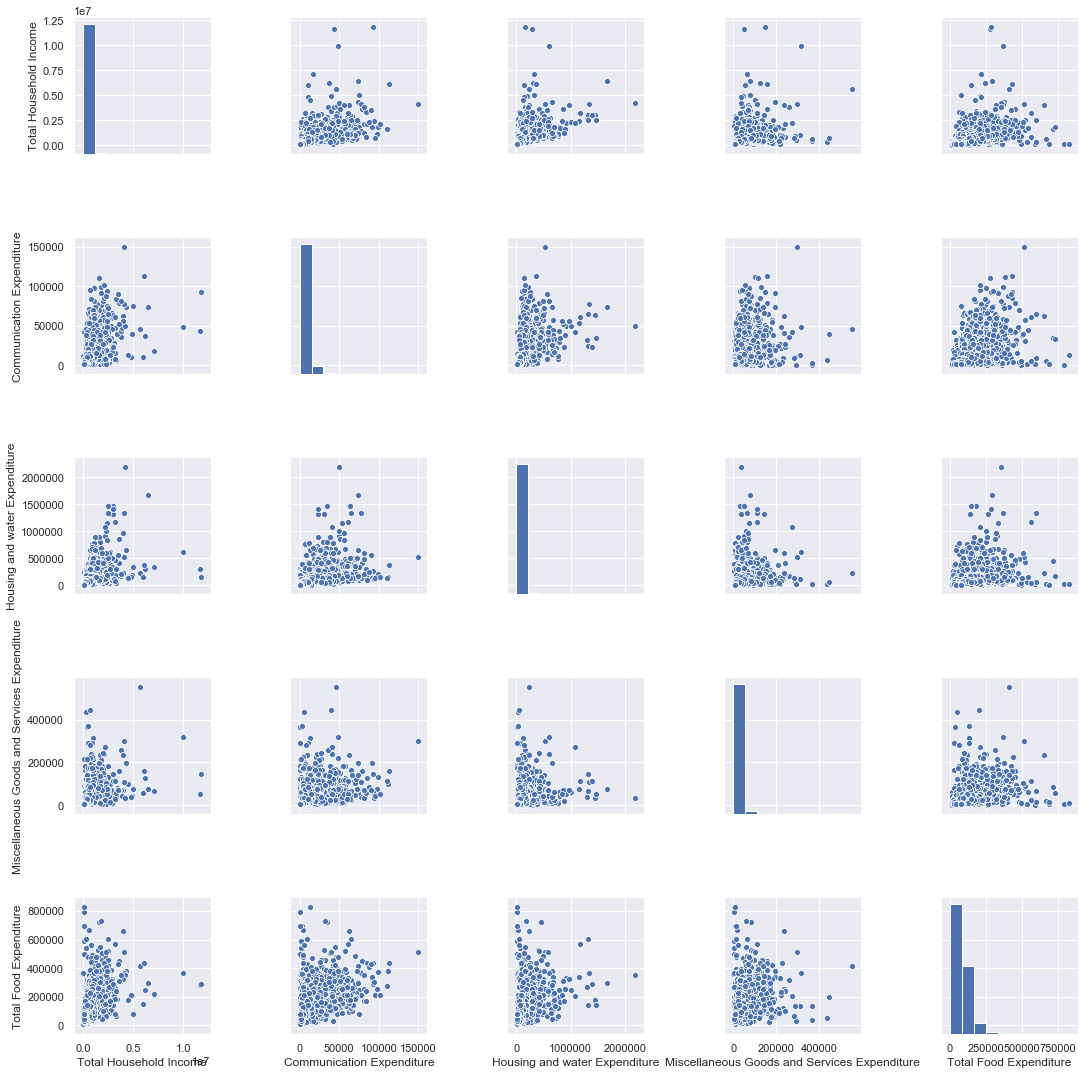

In [13]:
# Relações de pares de variáveis

sns.set()
sns.pairplot(df_tri[cols[:5]], height = 3)
plt.show()

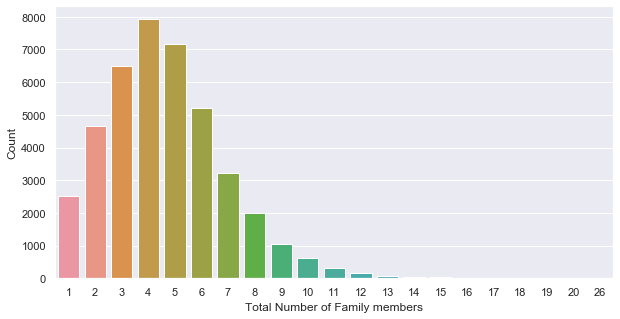

In [14]:
var = 'Total Number of Family members'
fig, ax = plt.subplots(figsize=(10,5))
s = sns.countplot(x=var, data=df_tri)
s.set(ylabel='Count')
plt.show()

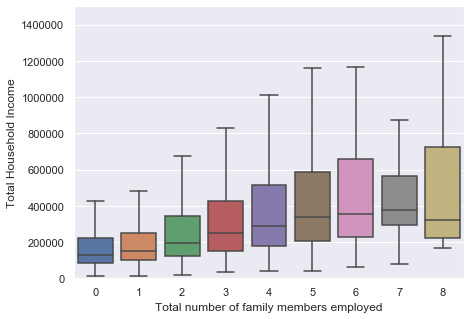

In [15]:
var = 'Total number of family members employed'
fig, ax = plt.subplots(figsize=(7,5))
s = sns.boxplot(x=var, y=target, data=df_tri, fliersize=0)
s.set(ylabel=target)
s.set_ylim(0,1.5*10**6)
plt.show()

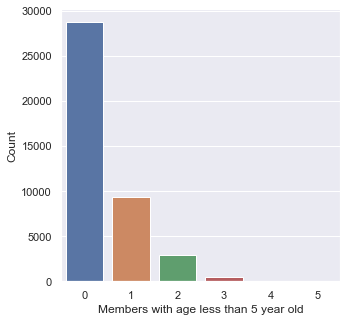

In [16]:
var = 'Members with age less than 5 year old'
fig, ax = plt.subplots(figsize=(5,5))
s = sns.countplot(x=var, data=df)
s.set(ylabel='Count')
plt.show()

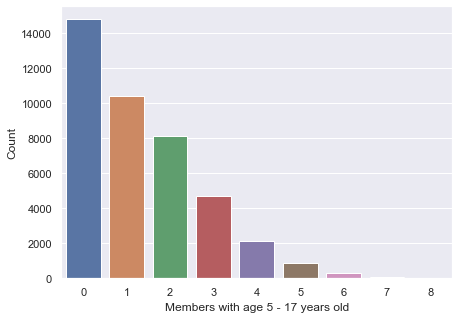

In [17]:
var = 'Members with age 5 - 17 years old'
fig, ax = plt.subplots(figsize=(7,5))
s = sns.countplot(x=var, data=df_tri)
s.set(ylabel='Count')
plt.show()

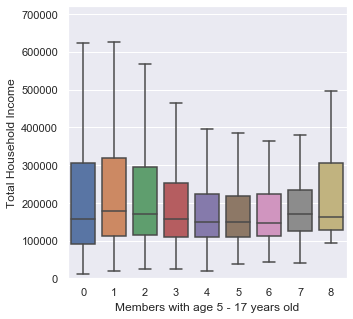

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
s = sns.boxplot(x=var, y=target, data=df_tri, fliersize=0)
s.set_ylim(0,720000)
plt.show()

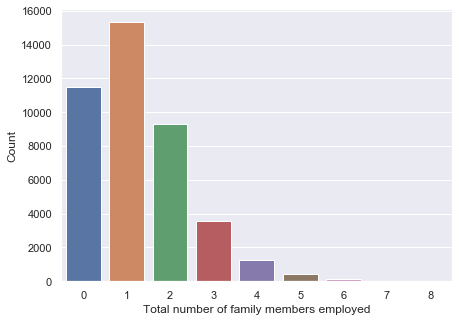

In [19]:
var = 'Total number of family members employed'
fig, ax = plt.subplots(figsize=(7,5))
s = sns.countplot(x=var, data=df_tri)
s.set(ylabel='Count')
plt.show()

## Obs:

O gráfico circular utilizado abaixo permite comparar perfil de gastos categóricos por região. Nela pode-se identificar certas tendências como valor de gastos com comida independe da região. Algumas regiões possuem gastos com moradias bem mais relevantes que outras. Ainda, pode-se notar que a região NCR possui todos os gastos acima da média e gastos muito acima da média em categorias como ocasião especial e transportes. Essas variações devem-se, provavelmente, a desigualdade de renda entre as regiões. Esta informação é extremamente importante para o nosso projeto, entretanto não a utilizaremos dado que este é apenas um protótipo e a complexidade de sua utilização. 

In [20]:
# Source: https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot
def radar_plot():
    
    regions = df['Region'].astype('category').cat.categories.tolist()
    region_dict = {i:region for i,region in enumerate(regions)}
    fig, ax = plt.subplots(int(len(regions)) , 1)
    fig.subplots_adjust(hspace=0.5)
    fig.set_figheight(100)
    fig.set_figwidth(100)

    for i in range(0, len(regions)):
        title = region_dict[i]
        var = 'Region'
        regions = df['Region'].astype('category').cat.categories.tolist()
        cat = [c for c in df.columns if ('Expenditure' in c)]
        values = [df[df[var]==regions[i]][c].mean() for c in cat]

        N = len(cat)
        x_as = [n / float(N) * 2 * pi for n in range(N)]
        values += values[:1]
        x_as += x_as[:1]

        # Set color of axes
        plt.rc('axes', linewidth=0.5, edgecolor="#888888")

        # Create polar plot
        ax = plt.subplot(int(len(regions)), 1, i+1, polar=True)

        # Set clockwise rotation. That is:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Set position of y-labels
        ax.set_rlabel_position(0)

        # Set color and linestyle of grid
        ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
        ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

        # Set number of radial axes and remove labels
        plt.xticks(x_as[:-1], [])

        # Set yticks
        max_ = 11
        plt.yticks([x*10000 for x in range(1,max_+1) if x %2 == 0], [str(x)+ "e4"for x in range(1,max_+1) if x %2 == 0], size=10)

        # Plot data
        ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

        # Fill area
        ax.fill(x_as, values, 'b', alpha=0.5)

        # Set axes limits
        max_val = max_*10000
        plt.ylim(0, max_val)

        # Draw ytick labels to make sure they fit properly
        for i in range(N):
            angle_rad = i / float(N) * 2 * pi

            if angle_rad == 0:
                ha, distance_ax = "center", 15000
            elif 0 < angle_rad < pi:
                ha, distance_ax = "left", 100
            elif angle_rad == pi:
                ha, distance_ax = "center", 15000
            else:
                ha, distance_ax = "right", 100

            ax.text(angle_rad, max_val + distance_ax + 15000, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")

        plt.title('Expenditures of Region ' + title)

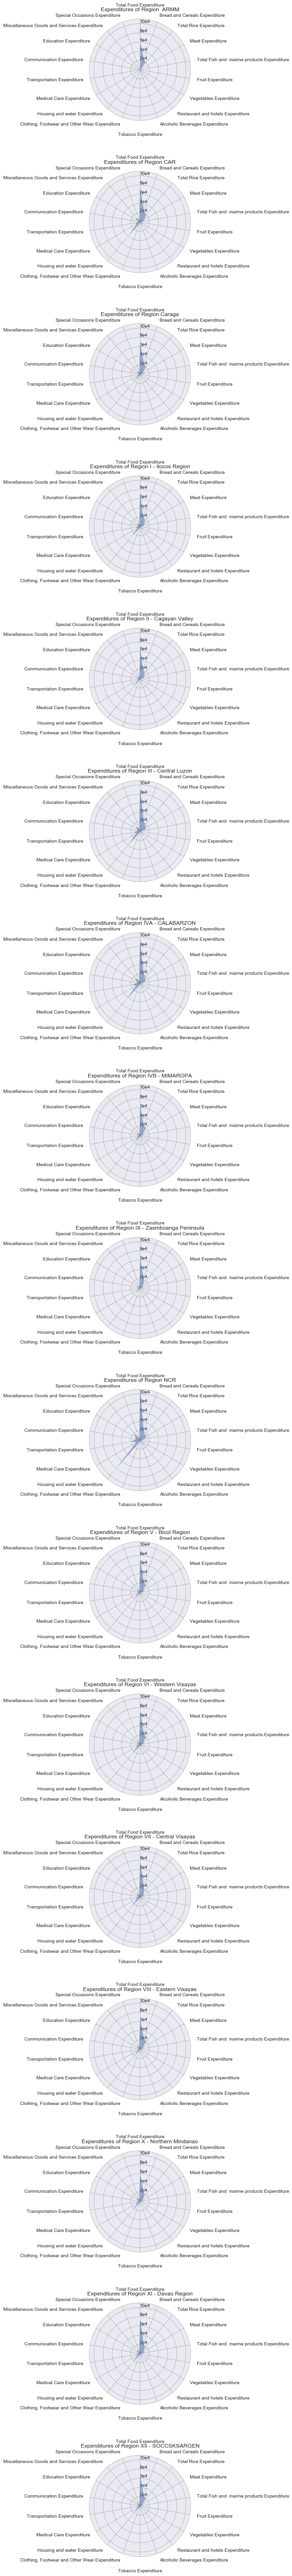

In [21]:
radar_plot()
plt.show()

In [70]:
features_in = ['Total Household Income', 
                'Total Number of Family members',
                'Members with age less than 5 year old',
                'Members with age 5 - 17 years old',
               'Total number of family members employed']

df_in = df[features_in]

features2pred = ['Total Food Expenditure', 
       'Restaurant and hotels Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 
       'Medical Care Expenditure', 
       'Transportation Expenditure',
       'Communication Expenditure', 
       'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Alcoholic Beverages Expenditure',
       'Special Occasions Expenditure']

target = 'Communication Expenditure'
y = df_tri[target]
X = df_in

In [23]:
# Pre processamento de dados: centralização e escalonamento

cols = list(X.columns)
std_scale = preprocessing.StandardScaler().fit(X[cols])
X[cols] = pd.DataFrame(std_scale.transform(X[cols]), columns=cols)

C:\Users\vitin\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [24]:
#cols = list(X.columns[X.dtypes == object])
#X = pd.DataFrame(pd.get_dummies(X, prefix=cols, columns=cols))

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 5 columns):
Total Household Income                     41544 non-null float64
Total Number of Family members             41544 non-null float64
Members with age less than 5 year old      41544 non-null float64
Members with age 5 - 17 years old          41544 non-null float64
Total number of family members employed    41544 non-null float64
dtypes: float64(5)
memory usage: 1.6 MB


In [26]:
X.describe(include='all')

,Total Household Income,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed
count,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04
mean,-1.801079e-16,-1.062799e-15,2.479103e-15,2.228188e-15,3.918427e-15
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-8.235952e-01,-1.594221e+00,-5.907639e-01,-9.677529e-01,-1.107525e+00
25%,-4.972882e-01,-7.171145e-01,-5.907639e-01,-9.677529e-01,-1.107525e+00
50%,-2.909821e-01,-2.785612e-01,-5.907639e-01,-2.575170e-01,-2.373073e-01
75%,1.519219e-01,5.985455e-01,8.493661e-01,4.527190e-01,6.329103e-01
max,4.032540e+01,9.369613e+00,6.609886e+00,4.714135e+00,5.854216e+00


In [27]:
# Utiliza técnica de PCA para fazer redução de dimensão no espaço vetorial de 5 para 3

pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of X_reduced:', X_reduced.shape)

Shape of X: (41544, 5)
Shape of X_reduced: (41544, 3)


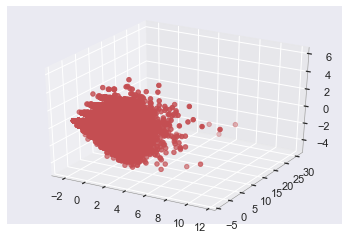

In [75]:
# Plot no espaço tridimensional reduzido. Cada ponto corresponde a uma amostra (família filipina)

fig = plt.figure()
ax = plt.axes(projection='3d')
x1 = X_reduced[:,0]
x2 = X_reduced[:,1]
x3 = X_reduced[:,2]
ax.scatter3D(x1, x2, x3, cmap='Greens');
#Axes3D.scatter(x1,x2,x3)

In [29]:
# Utilização de algoritmo de clustering para dividir usuários em 3 grupos de maior semelhança

k_means = cluster.KMeans(n_clusters=3)
x_cluster = k_means.fit_predict(X_reduced)
#print(k_means.labels_)
#print(k_means.labels_.shape)
print(x_cluster.shape)
print(x_cluster)
print(y.shape)

(41544,)
[0 0 1 ... 0 1 1]
(41544,)


In [30]:
test_size = 0.2
seed = 42
y = df_tri[target]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=test_size, random_state=seed)
_, _, X_cluster_train, X_cluster_test = train_test_split(X_reduced, x_cluster, test_size=test_size, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

print('Score:', reg.score(X_train, y_train))
print('Score test:', reg.score(X_test, y_test))
print('reg coef:', reg.coef_)
print('reg intercept:', reg.intercept_)
#reg.predict(np.array([[3, 5]]))
#array([16.])

Score: 0.39170006561522797
Score test: 0.402566650224296
reg coef: [ 559.51404464 4145.74963272 -650.77565165]
reg intercept: 4105.338950174793


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_cluster_test.shape)

(33235, 3)
(8309, 3)
(33235,)
(8309,)
(8309,)


(8309, 3)
x_eval: (8309, 3)
y_eval: (8309,)
Mean squared error: 29146717.07
(17974,)
(10250,)
(5011,)
(4479,)
(2571,)
(1259,)


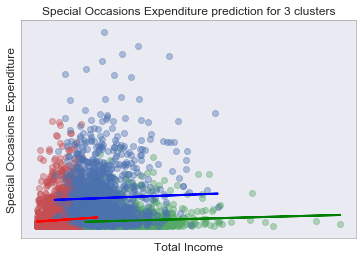

In [74]:
print(X_test.shape)
x_eval = X_test
y_eval = y_test
y_pred = reg.predict(x_eval)

print('x_eval:', x_eval.shape)
print('y_eval:', y_eval.shape)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_eval, y_pred))

mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b'])

#plt.scatter(x_eval[:,0], y_eval,c=X_cluster_test)

x_c1_train = X_train[X_cluster_train==0,0]
x_c2_train = X_train[X_cluster_train==1,0]
x_c3_train = X_train[X_cluster_train==2,0]

print(x_c1_train.shape)
print(x_c2_train.shape)
print(x_c3_train.shape)

y_c1_train = y_train[X_cluster_train==0]
y_c2_train = y_train[X_cluster_train==1]
y_c3_train = y_train[X_cluster_train==2]


x_c1_test = x_eval[X_cluster_test==0,0]
x_c2_test = x_eval[X_cluster_test==1,0]
x_c3_test = x_eval[X_cluster_test==2,0]

y_c1_test = y_test[X_cluster_test==0]
y_c2_test = y_test[X_cluster_test==1]
y_c3_test = y_test[X_cluster_test==2]

plt.scatter(x_c1_test, y_c1_test, alpha=0.4)
plt.scatter(x_c2_test, y_c2_test, alpha=0.4)
plt.scatter(x_c3_test, y_c3_test, alpha=0.4)

print(x_c1_test.shape)
print(x_c2_test.shape)
print(x_c3_test.shape)

reg1 = LinearRegression().fit(x_c1_train.reshape(-1,1), y_c1_train)
y_c1_pred = reg1.predict(x_c1_test.reshape(-1,1))

reg2 = LinearRegression().fit(x_c2_train.reshape(-1,1), y_c2_train)
y_c2_pred = reg2.predict(x_c2_test.reshape(-1,1))

reg3 = LinearRegression().fit(x_c3_train.reshape(-1,1), y_c3_train)
y_c3_pred = reg3.predict(x_c3_test.reshape(-1,1))

#plt.plot(x_eval[:,0], y_pred, color='blue', linewidth=1)
plt.plot(x_c1_test, y_c1_pred, color='red', linewidth=2)
plt.plot(x_c2_test, y_c2_pred, color='green', linewidth=2)
plt.plot(x_c3_test, y_c3_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.title('{} prediction for 3 clusters'.format(target))
plt.xlabel('Total Income')
plt.ylabel(target)

plt.show()


In [56]:
def plot_category(X_red, X_cluster, df_tri, target):
    test_size = 0.2
    seed = 42
    y = df_tri[target]
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=test_size, random_state=seed)
    _, _, X_cluster_train, X_cluster_test = train_test_split(X_red, X_cluster, test_size=test_size, random_state=seed)
    
    x_eval = X_test
    y_eval = y_test
    y_pred = reg.predict(x_eval)

    mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b'])

    x_c1_train = X_train[X_cluster_train==0,0]
    x_c2_train = X_train[X_cluster_train==1,0]
    x_c3_train = X_train[X_cluster_train==2,0]

    y_c1_train = y_train[X_cluster_train==0]
    y_c2_train = y_train[X_cluster_train==1]
    y_c3_train = y_train[X_cluster_train==2]

    x_c1_test = x_eval[X_cluster_test==0,0]
    x_c2_test = x_eval[X_cluster_test==1,0]
    x_c3_test = x_eval[X_cluster_test==2,0]

    y_c1_test = y_test[X_cluster_test==0]
    y_c2_test = y_test[X_cluster_test==1]
    y_c3_test = y_test[X_cluster_test==2]

    plt.scatter(x_c1_test, y_c1_test, alpha=0.4)
    plt.scatter(x_c2_test, y_c2_test, alpha=0.4)
    plt.scatter(x_c3_test, y_c3_test, alpha=0.4)

    reg1 = LinearRegression().fit(x_c1_train.reshape(-1,1), y_c1_train)
    y_c1_pred = reg1.predict(x_c1_test.reshape(-1,1))

    reg2 = LinearRegression().fit(x_c2_train.reshape(-1,1), y_c2_train)
    y_c2_pred = reg2.predict(x_c2_test.reshape(-1,1))

    reg3 = LinearRegression().fit(x_c3_train.reshape(-1,1), y_c3_train)
    y_c3_pred = reg3.predict(x_c3_test.reshape(-1,1))

    figure = plt.figure(figsize=(6, 6))
    plt.plot(x_c1_test, y_c1_pred, color='red', linewidth=2)
    plt.plot(x_c2_test, y_c2_pred, color='green', linewidth=2)
    plt.plot(x_c3_test, y_c3_pred, color='blue', linewidth=2)

    plt.xticks(())
    plt.yticks(())
    plt.title('{} prediction for 3 clusters'.format(target))
    plt.xlabel('Total Income')
    plt.ylabel(target)

    #plt.show()
    return figure

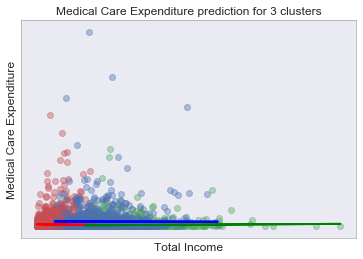

In [59]:
target = 'Medical Care Expenditure'
fig = plot_category(X_reduced, x_cluster, df_tri, target)
plt.show(fig)

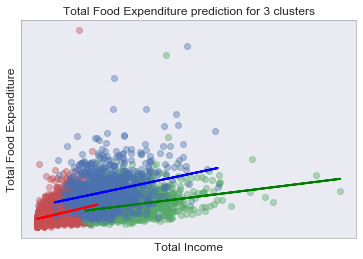

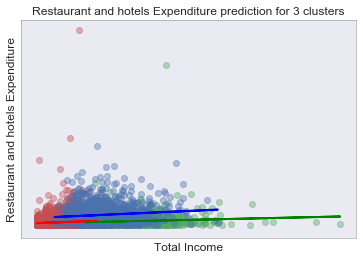

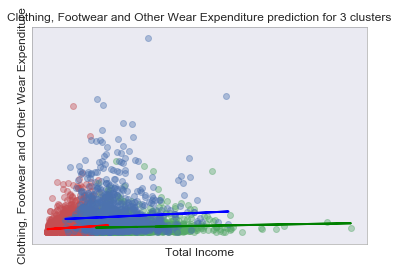

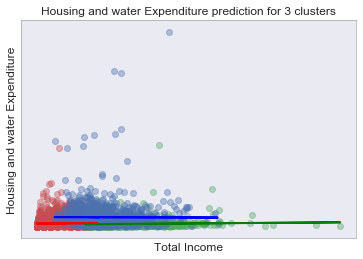

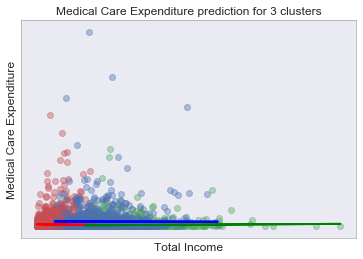

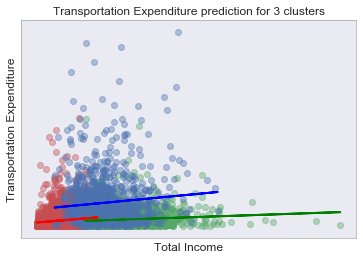

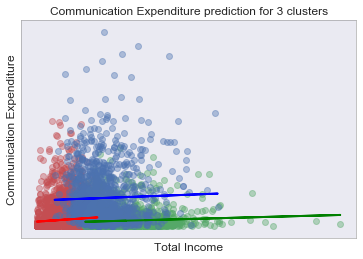

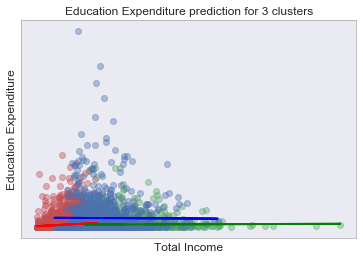

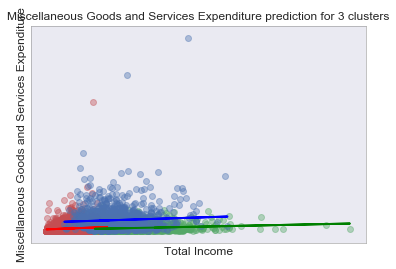

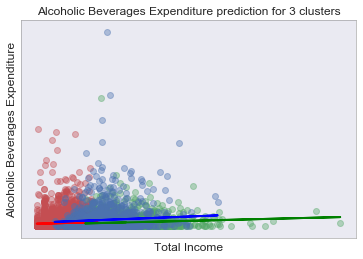

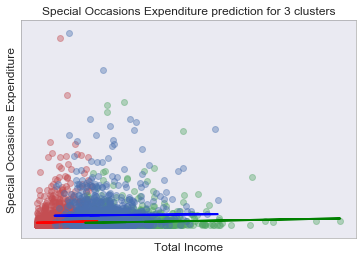

In [71]:
for target in features2pred:
    sub_fig = plot_category(X_reduced, x_cluster, df_tri, target)
